# Coherent SAT Solver (CSS)

Author: Samuel Reifenstein

Release version     : 2.1 <br>
Create date         : 2023/11/26 Samuel Reifenstein <br>



# 1) Description

## Introduction

The Coherent SAT Solver, or CSS, is a computational method designed to resolve Boolean satisfiability issues[1]. It employs a technique known as Chaotic Amplitude Control (CAC) to achieve this.

## Model

A boolean satisfiability problem can be given in conjunctive normal form (CNF). 
The coherent SAT solver is designed to find a vatiable assignment which satisifes of the problem, or, if it is unsatisfiable, find an assignment which satisifes the maximuum number of clauses (MAX-SAT). The SAT problem is specified by a sparse matrix $C_{ij}$ as follows:

$$C_{ij} =\left\{
\begin{array}{ll}
      1 &  i\text{th variable is included un-negated in }j\text{th clause} \\
      -1 & i\text{th variable is included negated in }j\text{th clause} \\
      0 & i\text{th variable is not included in }j\text{th clause} \\
\end{array} 
\right. $$

Then we also define the set $I_j$ for each clause as $I_j = \left\{ i \mid C_{ij} \neq 0 \right\}$
The boolean variables are represented by sof spins $x_i \in \mathbb{R}$ where $x_i > 0$ represents True and $x_i < 0$ represents False. Then we define the following quantaties:

$$K_j = \prod_{i \in I_j} \frac{1 - C_{ij}x_i}{2} \quad K_{ij} = \frac{-C_{ij}}{2}\prod_{k \in I_j, k \neq i} \frac{1 - C_{kj}x_k}{2} $$

Then, the coherent SAT solver equations can be written as:
$$\frac{dx_i}{dt} = (p-1)x_i - x_i^3 - e_i \sum_j K_{ij}$$
$$\frac{de_i}{dt} = \beta e_i (1 - x_i^2)$$

## Parameters

| Parameter | Interpretation |
| --------------- | --------------- |
| $T$          | Number of time steps         |
| $p$         | linear gain          |
| $\beta$         | Rate of change of auxiliary variables          |
| $\Delta t$         | Time step size          |


## Benchmark

A typical problem class used to benchmark SAT solver is random 3-SAT. A random 3-SAT problem is parameterised by number of variables (N), and number of clasues (M) as well as the clause to vairbale ratio $\alpha = M/N$. A problem is created by randomly generating M caluses with 3 vvariables each. Each variable is chosen randomly from the N possibilities (variables are not repeated in a clause) and the negation is chosen radnomly. It is known that in the limit that $N$ is large these random problems will be satisifiable with high probability if and only if $\alpha < \alpha_C$. This critical value of alpha is calculated to be around $\alpha_C \approx 4.26$.

## References

[1] Reifenstein, Sam, et al. "Coherent SAT solvers: a tutorial." Advances in Optics and Photonics 15.2 (2023): 385-441.


# 2) Template code

# Example 1: Random 3-SAT

In this example we run the SAT solver on a randomply generated 3-SAT instance with given parameters.
Then we plot one trajectory of the solver.

N 50
M 190
K 3
generating problem...
solving...
Sucess Rate 0.71
Best Energies Found [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0.]
4.41701078414917 s
Plots of first trajectory:


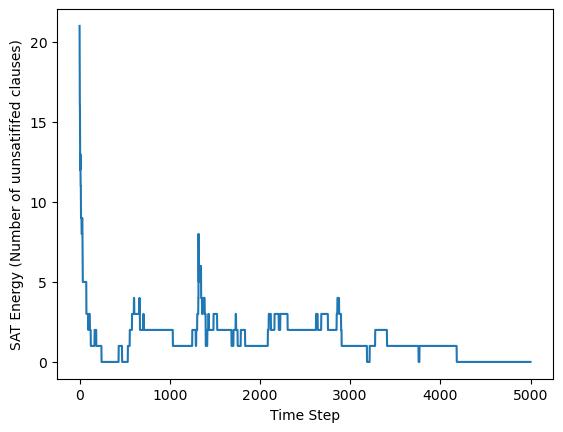

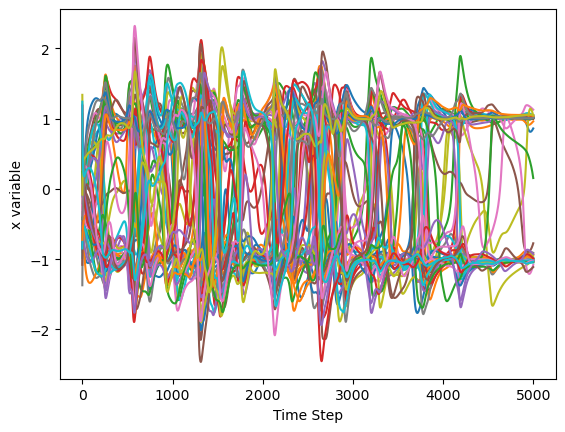

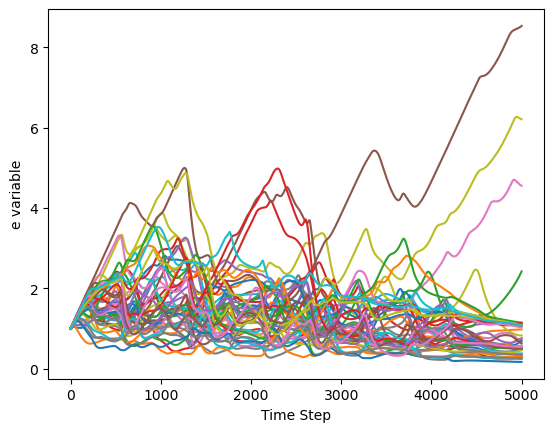

In [4]:
import numpy as np
import time
import SAT_CAC as satcac
import InstanceUtils as inst_uils



import torch
import numpy as np
import random
import matplotlib.pyplot as plt
import time
import scipy.sparse

#instance parameters
N = 50

K = 3
alpha = 3.8

M = int(N*alpha)

print("N", N)
print("M", M)
print("K", K)

print("generating problem...")

SEED = 0
random.seed(SEED)

#generate problem instance
C, IDX = inst_uils.randSAT(N,M,K)



#setup solver
pt_device = "cpu"

solver = satcac.SAT(pt_device, N, IDX = IDX, C = C)


#solver parameters
solver.T = 5000
solver.beta = 0.1
solver.p_init = -1.0
solver.p_end = 1.0
solver.dt = 0.05

#initialize solver to run 10 trajectories
R = 100
solver.init(R)

start_time = time.time()

#solve
print("solving...")



Ps, E_opt, traj_info = solver.traj(0, R_rec = 1)

print("Sucess Rate", Ps)
print("Best Energies Found", E_opt)

print(time.time() - start_time, "s")

print("Plots of first trajectory:")
plt.plot(traj_info["T"], traj_info["E"])
plt.xlabel("Time Step")
plt.ylabel("SAT Energy (Number of uunsatififed clauses)")

plt.show()
plt.close()


for i in range(N):
    plt.plot(traj_info["T"], traj_info["x"][:,i])
    
plt.xlabel("Time Step")
plt.ylabel("x variable")


plt.show()
plt.close()

for i in range(N):
    plt.plot(traj_info["T"], traj_info["e"][:,i])
    
plt.xlabel("Time Step")
plt.ylabel("e variable")

plt.show()
plt.close()






# Example 2: Exploring Phase Transisiton

In this example we will run the solver many times on instance with different clause to variable ratio $\alpha$.
This will allow us to understand how $\alpha$ effects the hardness of the problems generated.



alpha =  3.0
solving...
0/10 : 1.0
1/10 : 1.0
2/10 : 1.0
3/10 : 1.0
4/10 : 1.0
5/10 : 1.0
6/10 : 1.0
7/10 : 1.0
8/10 : 1.0
9/10 : 1.0
alpha =  3.25
solving...
0/10 : 1.0
1/10 : 1.0
2/10 : 1.0
3/10 : 1.0
4/10 : 1.0
5/10 : 1.0
6/10 : 1.0
7/10 : 1.0
8/10 : 1.0
9/10 : 1.0
alpha =  3.5
solving...
0/10 : 1.0
1/10 : 1.0
2/10 : 1.0
3/10 : 0.95
4/10 : 1.0
5/10 : 1.0
6/10 : 1.0
7/10 : 1.0
8/10 : 1.0
9/10 : 1.0
alpha =  3.75
solving...
0/10 : 0.775
1/10 : 1.0
2/10 : 1.0
3/10 : 1.0
4/10 : 1.0
5/10 : 1.0
6/10 : 1.0
7/10 : 0.85
8/10 : 1.0
9/10 : 0.075
alpha =  4.0
solving...
0/10 : 0.0
1/10 : 0.275
2/10 : 0.575
3/10 : 1.0
4/10 : 0.825
5/10 : 1.0
6/10 : 0.85
7/10 : 0.75
8/10 : 1.0
9/10 : 0.0
alpha =  4.25
solving...
0/10 : 0.0
1/10 : 0.975
2/10 : 0.55
3/10 : 1.0
4/10 : 0.0
5/10 : 1.0
6/10 : 0.9
7/10 : 1.0
8/10 : 0.975
9/10 : 0.0
alpha =  4.5
solving...
0/10 : 0.0
1/10 : 0.0
2/10 : 0.775
3/10 : 1.0
4/10 : 0.0
5/10 : 0.0
6/10 : 0.0
7/10 : 1.0
8/10 : 0.0
9/10 : 0.0
alpha =  4.75
solving...
0/10 : 0.0
1/

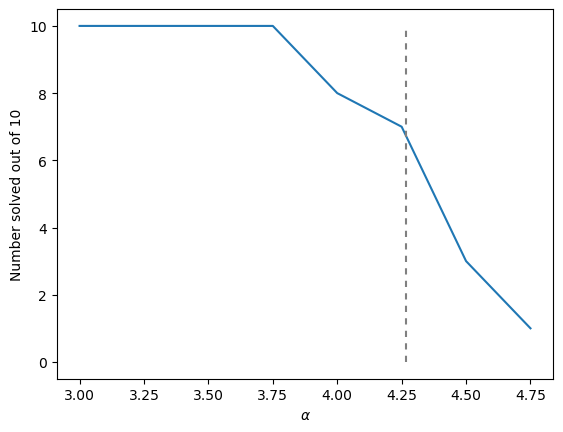

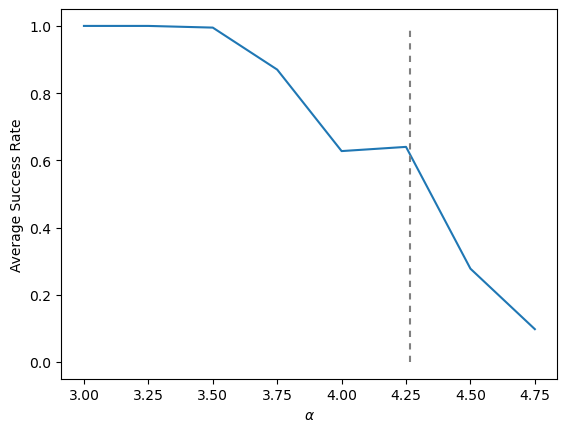

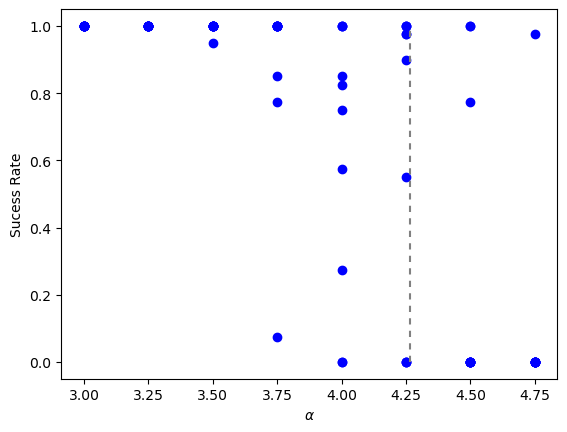

In [2]:
import numpy as np
import time
import SAT_CAC as satcac
import InstanceUtils as inst_uils



import torch
import numpy as np
import random
import matplotlib.pyplot as plt
import time
import scipy.sparse

#instance parameters
N = 50

K = 3
alpha_range = np.arange(3.0, 5.0, 0.25)

N_inst = 10

Ps_list_all = []
Ps_avg_list = []
Nsolved_list = []

for alpha in alpha_range:
    
    Ps_list = []
    M = int(N*alpha)
    print("alpha = ", alpha)
    print("solving...")
    for SEED in range(N_inst):
        
        
        

        
        random.seed(SEED)

        #generate problem instance
        C, IDX = inst_uils.randSAT(N,M,K)



        #setup solver
        pt_device = "cpu"

        solver = satcac.SAT(pt_device, N, IDX = IDX, C = C)


        #solver parameters
        solver.T = 2000
        solver.beta = 0.1
        solver.p_init = -1.0
        solver.p_end = 1.0
        solver.dt = 0.05

        #initialize solver to run 10 trajectories
        R = 40
        solver.init(R)

        start_time = time.time()

        



        Ps, E_opt = solver.traj(0)


        print("%i/%i :" % (SEED, N_inst) , Ps)
        Ps_list.append(Ps)
    
    Ps_list_all.append(Ps_list)
    Ps_avg_list.append(np.average(Ps_list))
    Nsolved_list.append(len([Ps for Ps in Ps_list if Ps > 0]))

    
#plot results
alpha_C = 4.266

plt.ylabel("Number solved out of %i" % N_inst)
plt.xlabel(r"$\alpha$")

plt.plot(alpha_range, Nsolved_list)
plt.plot([alpha_C, alpha_C], [0, N_inst], color = "gray", dashes = [3,3])

plt.show()
plt.close()


plt.ylabel("Average Success Rate")
plt.xlabel(r"$\alpha$")

plt.plot(alpha_range, Ps_avg_list)
plt.plot([alpha_C, alpha_C], [0, 1], color = "gray", dashes = [3,3])

plt.show()
plt.close()


#plot results

plt.ylabel("Sucess Rate")
plt.xlabel(r"$\alpha$")


for alpha, Ps_list in zip(alpha_range, Ps_list_all):
    plt.scatter([alpha]*N_inst, Ps_list, color = "blue")

    
plt.plot([alpha_C, alpha_C], [0, 1], color = "gray", dashes = [3,3])

plt.show()
plt.close()



## BSD 3-Clause License

#Copyright (c) 2023, NTT Research Inc., PHI labs, algorithms

#Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

#1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

#2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

#3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

#THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.